In [29]:
%load_ext autoreload
%autoreload 2

import cosmohmc.linear.sampler as sampler
import numpy as np
from matplotlib import pyplot as plt
import corner

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


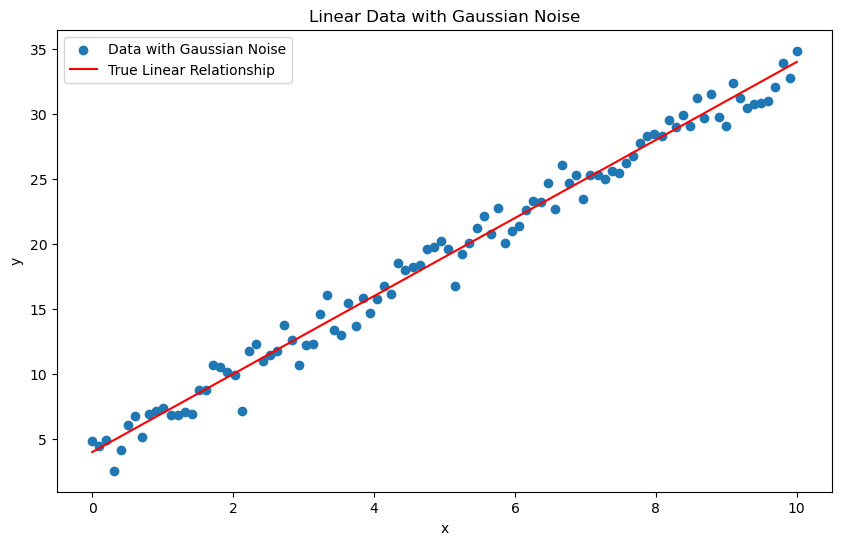

In [30]:
slope = 3
intercept = 4
n_points = 100

# Generate linear data
x = np.linspace(0, 10, n_points)
y_true = slope * x + intercept

# Add Gaussian noise
np.random.seed(20)
noise = np.random.normal(0, 1, n_points)
y_noisy = y_true + noise

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, label='Data with Gaussian Noise')
plt.plot(x, y_true, color='red', label='True Linear Relationship')
plt.title('Linear Data with Gaussian Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [89]:
#linear_dist = sampler.LinearPost(x_data=x, y_data=y_noisy, anal_grad=False, proposal_width=0.5, step_size=0.005, n_steps=20, n_samples=10000)

In [31]:
def linear_model(x, slope, intercept):
    return slope * x + intercept
def linear_model_grad(x, y, params, sigma):
    slope, intercept = params
    d_slope = np.sum((y - (slope * x + intercept)) * x) / sigma ** 2
    d_intercept = np.sum(y - (slope * x + intercept)) / sigma ** 2
    return np.array([d_slope, d_intercept])

In [32]:
linear_dist = sampler.LinearPost_flex(model_fn=linear_model,x_data=x, y_data=y_noisy, grad_fn = linear_model_grad, proposal_width=0.5, step_size=0.01, n_steps=10, n_samples=100000)

In [33]:
burnin = 10000
mc_samples, acc_mc = linear_dist.mcmc_sample()
hmc_samples, acc_hmc = linear_dist.hmc_sample()
mc_samples = mc_samples[burnin:]
hmc_samples = hmc_samples[burnin:]

Sampling (MCMC):   0%|          | 0/100000 [00:00<?, ?it/s]/Users/sayan/Project_Geneva/TarunsCMBLab/CosmoHMC/cosmohmc/distnd/sampler.py:274: RuntimeWarning: overflow encountered in exp
  accept_prob = np.exp(proposal_log_prob - current_log_prob)
Sampling (HMC): 100%|██████████| 100000/100000 [00:28<00:00, 3494.82it/s]


In [37]:
print("MCMC acceptance rate: ", acc_mc)
print("HMC acceptance rate: ", acc_hmc)

MCMC acceptance rate:  0.02245
HMC acceptance rate:  0.99036


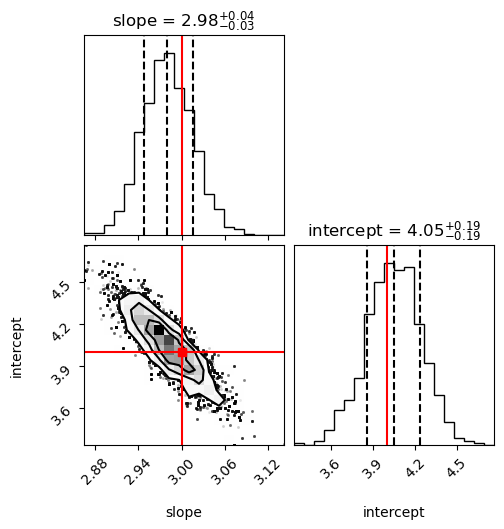

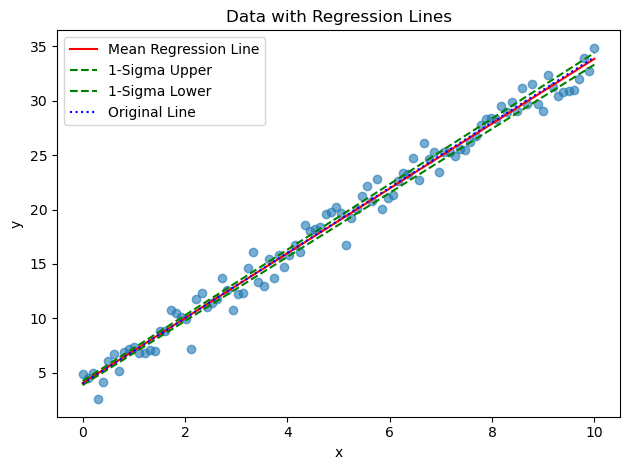

In [35]:
true_values = [slope, intercept]

figure = corner.corner(mc_samples, labels=["slope", "intercept"],
                       truths=true_values, quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 12}, truth_color="red")

#figure.suptitle('Corner Plot for 4D Gaussian Samples (HMC)')
plt.show()

samples = mc_samples
mean_slope = np.mean(samples[:,0])
std_slope = np.std(samples[:,0])
mean_intercept = np.mean(samples[:,1])
std_intercept = np.std(samples[:,1])

# Generate lines for mean and 1-sigma
x_line = np.linspace(np.min(x), np.max(x), 100)
y_line_mean = mean_slope * x_line + mean_intercept
y_line_upper = (mean_slope + std_slope) * x_line + (mean_intercept + std_intercept)
y_line_lower = (mean_slope - std_slope) * x_line + (mean_intercept - std_intercept)
y_original_line = slope * x_line + intercept

# Plotting the slope and intercept distributions
plt.scatter(x, y_noisy, alpha=0.6)
plt.plot(x_line, y_line_mean, color='red', label='Mean Regression Line')
plt.plot(x_line, y_line_upper, color='green', linestyle='dashed', label='1-Sigma Upper')
plt.plot(x_line, y_line_lower, color='green', linestyle='dashed', label='1-Sigma Lower')
plt.plot(x_line, y_original_line, color='blue', linestyle='dotted', label='Original Line')
plt.title('Data with Regression Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()



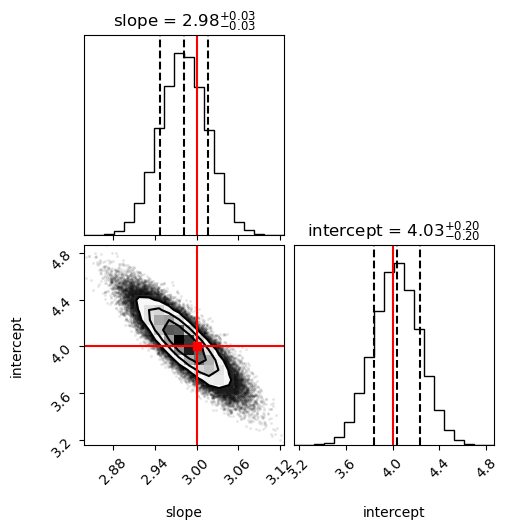

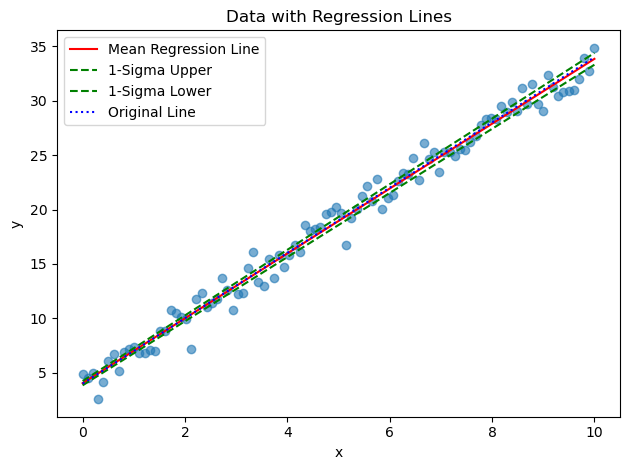

In [36]:
figure = corner.corner(hmc_samples, labels=["slope", "intercept"],
                       truths =true_values, quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 12}, truth_color="red")

samples = hmc_samples
mean_slope = np.mean(samples[:,0])

mean_slope = np.mean(samples[:,0])
std_slope = np.std(samples[:,0])
mean_intercept = np.mean(samples[:,1])
std_intercept = np.std(samples[:,1])

# Generate lines for mean and 1-sigma
x_line = np.linspace(np.min(x), np.max(x), 100)
y_line_mean = mean_slope * x_line + mean_intercept
y_line_upper = (mean_slope + std_slope) * x_line + (mean_intercept + std_intercept)
y_line_lower = (mean_slope - std_slope) * x_line + (mean_intercept - std_intercept)
#figure.suptitle('Corner Plot for 4D Gaussian Samples (HMC)')
plt.show()


# Plotting the slope and intercept distributions
plt.scatter(x, y_noisy, alpha=0.6)
plt.plot(x_line, y_line_mean, color='red', label='Mean Regression Line')
plt.plot(x_line, y_line_upper, color='green', linestyle='dashed', label='1-Sigma Upper')
plt.plot(x_line, y_line_lower, color='green', linestyle='dashed', label='1-Sigma Lower')
plt.plot(x_line, y_original_line, color='blue', linestyle='dotted', label='Original Line')
plt.title('Data with Regression Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()